In [1]:
import pandas as pd
import ast
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import urllib.request

#from PIL import Image



In [2]:
df = pd.read_csv (r'movies_metadata.csv')


C:\Users\Hamza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
image_data = pd.DataFrame(columns = ["genre"])

for index, row in df.iterrows():
    if index in [10000, 20000, 30000, 40000]:
        print(index)
    if len(row[3]) >= 3 and type(row[11]) is str:
        genre = []
        for elem in ast.literal_eval(row[3]):
            genre.append(elem['name'])
#         poster_path = "http://image.tmdb.org/t/p/w185" + row[11] 
#         download_path = "images/"+ str(len(image_data)) + ".jpg"
        
        
        
        
#         try:
#             urllib.request.urlretrieve(poster_path,download_path)
#         except:
#             print("An exception occurred")
#             continue
            
        

        row = pd.DataFrame({"genre":[genre]})
    
        image_data = image_data.append(row, ignore_index = True)
        
        

        
        
    

10000
20000
30000
40000


In [5]:
def convert(data, genres):
    out = [0]* len(genres)
    for i in enumerate(data):
        out[genres.index(i[1])] = 1
    return tuple(out)

def load_data(data,genres):
    x = data['poster']
    y = data['genre']
    y = y.apply(convert, args=(genres,))
    return x,y


In [6]:
# This function just generates all possible pairs of movies
def list2pairs(l):
    # itertools.combinations(l,2) makes all pairs of length 2 from list l.
    pairs = list(itertools.combinations(l, 2))*2
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    for i in l:
        pairs.append([i,i])
    return pairs

In [7]:
# get all genre lists pairs from all movies
allPairs = []
for index, row in image_data.iterrows():

    allPairs.extend(list2pairs(row[0]))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

In [8]:
genres = list(nr_ids)
print(genres)


['Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror', 'Mardock Scramble Production Committee', 'Music', 'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie', 'Telescene Film Group Productions', 'The Cartel', 'Thriller', 'Vision View Entertainment', 'War', 'Western']


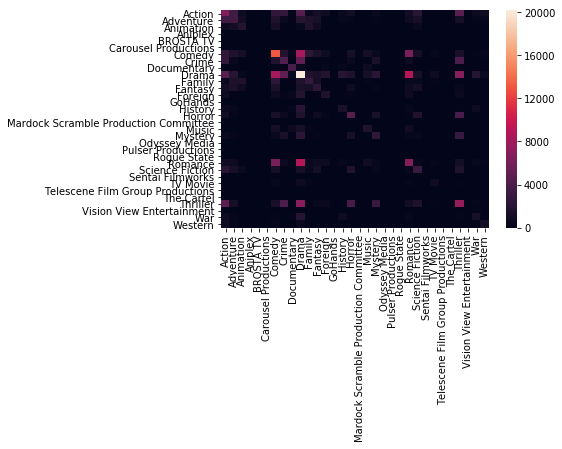

In [9]:
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(nr_ids[i])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

In [10]:
from sklearn.cluster import SpectralCoclustering

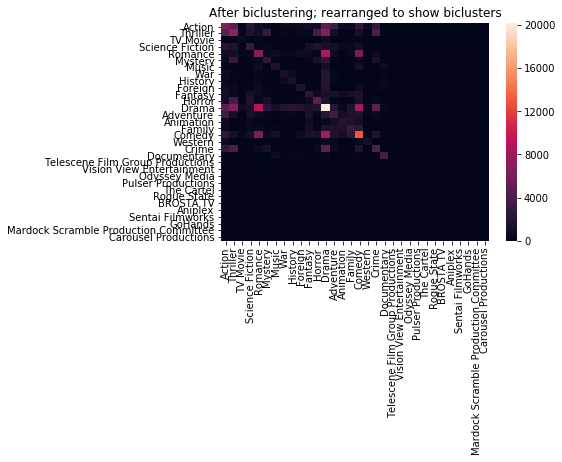

In [11]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(nr_ids[i])
    
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()